# Literature comparisons

We want to make a comparisonb etween our stars and literature values. We'll do this twice:
- One comparison to LEGACY and Kages
- One comparison to published asteroseismic rotation rates

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u

sns.set_palette('colorblind')
sns.set_context('poster')

/Users/Oliver/Library/Python/3.7/lib/python/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def mnras_size(fig_width_pt, square=False):
    inches_per_pt = 1.0/72.00              # Convert pt to inches
    golden_mean = (np.sqrt(5)-1.0)/2.0     # Most aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width*golden_mean
    return [fig_width,fig_height]

In [3]:
f_ati = pd.read_csv('../data/atium.csv',index_col=0)
f_ati = f_ati[f_ati.eye_flag != 3]
f_ati = f_ati[np.isfinite(f_ati.nus.values)]

f_ati['i'] = np.rad2deg(f_ati['i'])
f_ati['u_i'] = np.rad2deg(f_ati['u_i'])
f_ati['l_i'] = np.rad2deg(f_ati['l_i'])
print(f'We have {len(f_ati)} stars with results')

We have 94 stars with results


Read in the LEGACY & Kages literature results

In [4]:
f_col = pd.read_csv('../data/LK_private.csv', index_col=0)
f_col.head(2)

,KIC,i,u_i,l_i,nus,l_nus,u_nus,nus*,l_nus*,u_nus*,P,l_P,u_P,label
0,1435467,57.190635,11.73913,8.729097,1.653867,0.26038,0.212415,1.356938,0.088360,0.106032,8.529554,0.078141,0.065117,L
1,2837475,82.474916,5.41806,7.224080,2.680312,0.15924,0.156055,2.607719,0.145851,0.145851,4.438390,0.055930,0.055930,L


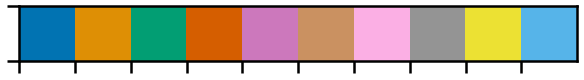

In [5]:
cmap = sns.color_palette('colorblind')
sns.palplot(cmap)

### flag anomalous rotators

In [6]:
f_ati['exclude'] = np.zeros(len(f_ati))
dP = f_ati['P'] / f_col['P']
DP = f_ati['P'] - f_col['P']
f_ati.loc[dP > 2, 'exclude'] = 1
f_ati.loc[DP < -50, 'exclude'] = 0
dnus = f_ati['nus*'] / f_col['nus*']
f_ati.loc[dnus > 5, 'exclude'] = 2
print(f'Stars before cut: {len(f_ati)}')
col = f_col[f_ati.exclude == 0]
ati = f_ati[f_ati.exclude == 0]
print(f'Stars after cut: {len(ati)}')

Stars before cut: 94
Stars after cut: 84


In [7]:
f_col[f_ati.exclude == 3][['KIC','P','i','l_i','u_i','nus','nus*','label']]

,KIC,P,i,l_i,u_i,nus,nus*,label


In [8]:
f_ati[f_ati.exclude == 3][['KIC','age','P','i','l_i','u_i','nus','nus*','eye_flag','rhat_flag','neff_split', 'source']]

,KIC,age,P,i,l_i,u_i,nus,nus*,eye_flag,rhat_flag,neff_split,source


In [9]:
c = ati['fit_d01']*ati['dnu']
c.values[15]

22.37014022026641

In [10]:
ati.columns

Index(['KIC', 'Teff', 'age', 'dnu', 'eTeff', 'ednu', 'efeh', 'enumax', 'feh',
       'loage', 'lomodlogg', 'lomodmass', 'lomodrad', 'modlogg', 'modmass',
       'modrad', 'numax', 'source', 'upage', 'upmodlogg', 'upmodmass',
       'upmodrad', 'G', 'bprp', 'hrclass', 'neff_xsplit', 'neff_cosi',
       'neff_split', 'neff_i', 'l_nus*', 'nus*', 'u_nus*', 'l_cosi', 'cosi',
       'u_cosi', 'l_nus', 'nus', 'u_nus', 'l_i', 'i', 'u_i', 'fit_numax',
       'efit_numax', 'fit_d01', 'efit_d01', 'fit_d02', 'efit_d02',
       'fit_epsilon', 'efit_epsilon', 'V1', 'eV1', 'V2', 'eV2', 'l_P', 'P',
       'u_P', 'l_vsini', 'vsini', 'u_vsini', 'rhat_flag', 'eye_flag', 'ebprp',
       'exclude'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

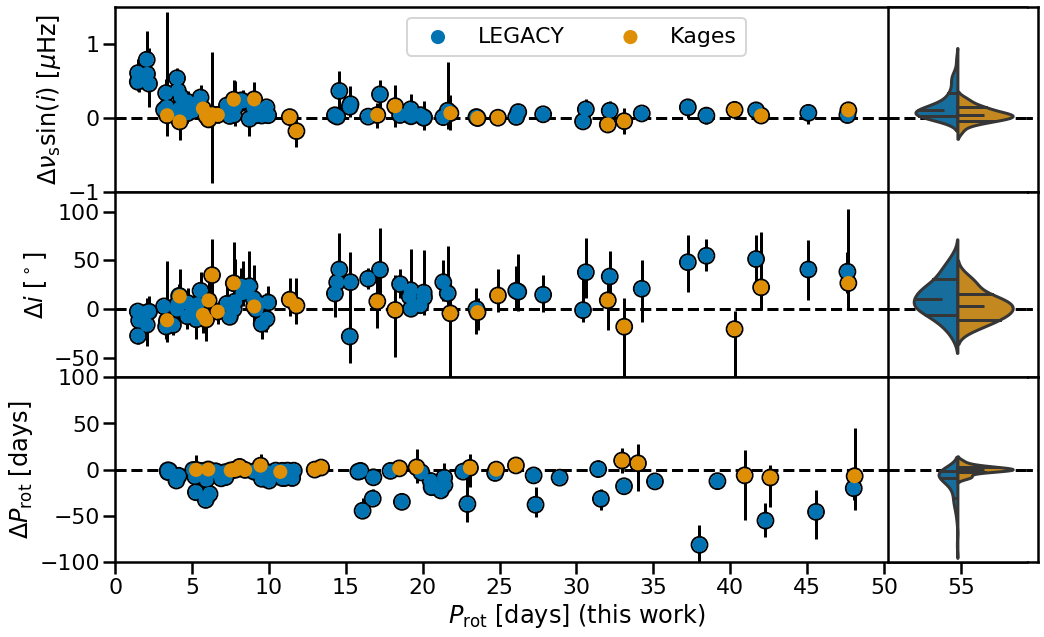

<Figure size 432x288 with 0 Axes>

In [19]:
size=200
col['x'] = np.ones(len(col)) * 60

fig, axes = plt.subplots(3, 1, figsize=mnras_size(2*595), sharex=True)

ax0 = axes[0]
ax1 = axes[1]
ax2 = axes[2]

pk = ati['P'][ati.source == 'K']
pl = ati['P'][ati.source == 'L']

ak = ati['nus*'][ati.source == 'K']
ck = col['nus*'][ati.source == 'K']
al = ati['nus*'][ati.source == 'L']
cl = col['nus*'][ati.source == 'L']
upper = np.sqrt(ati['u_nus*']**2 + col['u_nus*']**2)
lower = np.sqrt(ati['l_nus*']**2 + col['l_nus*']**2)
ax0.scatter(pl, al-cl, s=size, ec='None', lw=1, zorder = 3, label='LEGACY')
ax0.scatter(pk, ak-ck, s=size, ec='None', lw=1, zorder = 3, label='Kages')

ax0.scatter(pk, ak-ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax0.scatter(pl, al-cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax0.axhline(0., ls='--', zorder=1, c='k')
ax0.errorbar(ati['P'], ati['nus*']-col['nus*'], yerr=[lower, upper],
             fmt='|', zorder=2, c='k')
ax0.set_ylabel(r'$\Delta\nu_{\rm s}\sin(i)$ [$\mu$Hz]')
# ax0.set_title(r'$\Delta \equiv$(this work - literature)')

ak = ati['i'][ati.source == 'K']
ck = col['i'][ati.source == 'K']
al = ati['i'][ati.source == 'L']
cl = col['i'][ati.source == 'L']
upper = np.sqrt(ati['u_i']**2 + col['u_i']**2)
lower = np.sqrt(ati['l_i']**2 + col['l_i']**2)
ax1.scatter(pl, al-cl, s=size, ec='None', lw=1, zorder = 3, label='L')
ax1.scatter(pk, ak-ck, s=size, ec='None', lw=1, zorder = 3, label='K')

ax1.scatter(pk, ak-ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2, label='K')
ax1.scatter(pl, al-cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2, label='L')
ax1.axhline(0., ls='--', zorder=1, c='k')
ax1.errorbar(ati['P'], ati['i']-col['i'], yerr=[lower, upper],
             fmt='|', zorder=2, c='k')
ax1.set_ylabel(r'$\Delta i$ [$^\circ$]')

ak = ati['P'][ati.source == 'K']
ck = col['P'][ati.source == 'K']
al = ati['P'][ati.source == 'L']
cl = col['P'][ati.source == 'L']
upper = np.sqrt(ati['u_P']**2 + col['u_P']**2)
lower = np.sqrt(ati['l_P']**2 + col['l_P']**2)
ax2.scatter(pl, al-cl, s=size, ec='None', lw=1, zorder = 3, label='L')
ax2.scatter(pk, ak-ck, s=size, ec='None', lw=1, zorder = 3, label='K')

ax2.scatter(pk, ak-ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2, label='K')
ax2.scatter(pl, al-cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2, label='L')
ax2.axhline(0., ls='--', zorder=1, c='k')
ax2.errorbar(ati['P'], ati['P']-col['P'], yerr=[lower, upper],
            fmt='|', zorder=2, c='k')
ax2.set_ylabel(r'$\Delta P_{\rm rot}$ [days]')
ax2.set_ylim(-100, 100)
ax2.set_xlabel(r'$P_{\rm rot}$ [days] (this work)')

plt.subplots_adjust(hspace=0)

from mpl_toolkits.axes_grid.inset_locator import inset_axes
col['Dnus*'] = ati['nus*'] - col['nus*']
col['Di'] = ati['i'] - col['i']
col['DP'] = ati['P'] - col['P']

# Violin 1
iax0 = inset_axes(ax0, height ="100%", width="15%", loc=7)
sns.violinplot(x='x', y='Dnus*', hue='label', 
               inner='quartile',
               data=col, palette=cmap, split=True, ax = iax0, legend=False)
iax0.spines['right'].set_visible(False)
iax0.spines['left'].set_visible(True)
iax0.get_xaxis().set_visible(False)
iax0.get_yaxis().set_visible(False)
iax0.axhline(0, ls='--', c='k', zorder=0)
iax0.legend_.remove()
ax0.set_ylim(-1, 1.5)
iax0.set_ylim(-1, 1.5)

# Violin 2
iax1 = inset_axes(ax1, height ="100%", width="15%", loc=7)
sns.violinplot(x='x', y='Di', hue='label', data=col, 
                inner='quartile',
                palette=cmap, split=True, ax = iax1, legend=False)
iax1.spines['right'].set_visible(False)
iax1.spines['left'].set_visible(True)
iax1.get_xaxis().set_visible(False)
iax1.get_yaxis().set_visible(False)
iax1.axhline(0, ls='--', c='k', zorder=0)
iax1.legend_.remove()
ax1.set_ylim(-70, 120)
iax1.set_ylim(-70, 120)

# Violin 2
iax2 = inset_axes(ax2, height ="100%", width="15%", loc=7)
sns.violinplot(x='x', y='DP', hue='label', data=col,
                inner='quartile',
                palette=cmap, split=True, ax = iax2, legend=False)
iax2.spines['right'].set_visible(False)
iax2.spines['left'].set_visible(True)
iax2.get_xaxis().set_visible(False)
iax2.get_yaxis().set_visible(False)
iax2.axhline(0, ls='--', c='k', zorder=0)
iax2.legend_.remove()
ax2.set_xlim(2, 60)
ax2.set_ylim(-100, 100)
iax2.set_ylim(-100, 100)
ax0.legend(ncol=2, loc='upper center')# bbox_to_anchor=[0.63,1.25,0.0,0.0])

ax2.set_xticks(np.arange(0, 60, 5))

plt.show()
# plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/litcomp.pdf', bbox_inches='tight', rasterized=True)
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/litcomp.pdf', bbox_inches='tight', rasterized=True)

### Comparing to other published literature

In [75]:
lit = pd.read_csv('../data/literature_seismo.csv', index_col=0)
lit.head(2)

,KIC,C15_P_rot,C15_eP_rot,D16_P_rot,D16_u_eP_rot,D16_l_eP_rot,N15_P_rot,N15_u_eP_rot,N15_l_eP_rot,B18_P_rot,B18_l_eP_rot,B18_u_eP_rot
0,1435467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2837475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
len(np.isfinite(lit['D16_P_rot']))

94

In [78]:
ati = ati.copy()
ati.loc[np.isfinite(lit['D16_P_rot']).values]

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp,exclude
62,12069424,5825,6.6735,103.277,50,0.021,0.03,4.6,0.10,0.7666,...,1.114095,20.516716,1.975841,0.061279,2.112675,0.060261,rhat_1,2,0.001212,0.0
63,12069449,5750,7.3922,116.929,50,0.012,0.02,5.0,0.05,0.9103,...,1.474881,21.178840,1.808344,0.062482,1.462994,0.063263,NaN,0,0.001060,0.0


In [79]:
ati['logP'] = np.log(ati.P)
ati['uplogP'] = np.log(ati.P + ati.u_P) - ati.logP
ati['lologP'] = ati.logP - np.log(ati.P - ati.l_P)

In [80]:
lit['logD16P'] = np.log(lit.D16_P_rot)
lit['uplogD16P'] = np.log(lit.D16_P_rot + lit.D16_u_eP_rot) - lit.logD16P
lit['lologD16P'] = lit.logD16P - np.log(lit.D16_P_rot - lit.D16_l_eP_rot)

lit['logN15P'] = np.log(lit.N15_P_rot)
lit['uplogN15P'] = np.log(lit.N15_P_rot + lit.N15_u_eP_rot) - lit.logN15P
lit['lologN15P'] = lit.logN15P - np.log(lit.N15_P_rot - lit.N15_l_eP_rot)

lit['logB18P'] = np.log(lit.B18_P_rot)
lit['uplogB18P'] = np.log(lit.B18_P_rot + lit.B18_u_eP_rot) - lit.logB18P
lit['lologB18P'] = lit.logB18P - np.log(lit.B18_P_rot - lit.B18_l_eP_rot)

/Users/Oliver/Library/Python/3.7/lib/python/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Flag anomalous rotators

In [81]:
f_ati = ati.copy()
ati['exclude'] = 0
dP = ati.logP / lit.logB18P
ati.loc[dP < 0.5, 'exclude'] = 1

In [82]:
ati.columns

Index(['KIC', 'Teff', 'age', 'dnu', 'eTeff', 'ednu', 'efeh', 'enumax', 'feh',
       'loage', 'lomodlogg', 'lomodmass', 'lomodrad', 'modlogg', 'modmass',
       'modrad', 'numax', 'source', 'upage', 'upmodlogg', 'upmodmass',
       'upmodrad', 'G', 'bprp', 'hrclass', 'neff_xsplit', 'neff_cosi',
       'neff_split', 'neff_i', 'l_nus*', 'nus*', 'u_nus*', 'l_cosi', 'cosi',
       'u_cosi', 'l_nus', 'nus', 'u_nus', 'l_i', 'i', 'u_i', 'fit_numax',
       'efit_numax', 'fit_d01', 'efit_d01', 'fit_d02', 'efit_d02',
       'fit_epsilon', 'efit_epsilon', 'V1', 'eV1', 'V2', 'eV2', 'l_P', 'P',
       'u_P', 'l_vsini', 'vsini', 'u_vsini', 'rhat_flag', 'eye_flag', 'ebprp',
       'exclude', 'logP', 'uplogP', 'lologP'],
      dtype='object')

In [84]:
ati[ati.exclude == 1][['KIC','age','P', 'i', 'eye_flag','rhat_flag']]

,KIC,age,P,i,eye_flag,rhat_flag
15,6603624,7.8234,1.218267,6.893700,0,NaN
36,8760414,11.6642,2.004548,7.616282,0,rhat_01
37,8938364,10.2508,2.035735,8.676839,1,rhat_1


In [85]:
f_col[ati.exclude ==1]

,KIC,i,u_i,l_i,nus,l_nus,u_nus,nus*,l_nus*,u_nus*,P,l_P,u_P,label
15,6603624,2.709030,4.515050,2.107023,0.690304,0.870711,0.467211,0.030615,0.038460,0.023600,378.050174,0.770870,1.256233,L
36,8760414,4.816054,3.612040,3.311037,1.757128,0.617409,0.649344,0.137270,0.104225,0.092066,84.316100,0.670690,0.759272,L
37,8938364,10.836120,16.555184,7.525084,0.404663,0.622266,0.259278,0.083155,0.052341,0.060039,139.186701,0.722007,0.629442,L


In [86]:
lit.index = ati.index
lit[ati.exclude ==1][['KIC','B18_P_rot']]

,KIC,B18_P_rot
15,6603624,39.718854
36,8760414,26.916451
37,8938364,50.519747


In [97]:
f_ati[ati.P < 2.1]

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp,exclude,logP,uplogP,lologP
15,6603624,5674,7.8234,110.128,77,0.012,0.1,5.4,0.28,0.8624,...,0.664208,5.701380,0.641580,NaN,0,0.001042,2.0,0.197429,0.029690,0.015791
36,8760414,5873,11.6642,117.230,77,0.022,0.1,9.1,-0.92,1.6059,...,1.878079,3.083780,1.152309,rhat_01,0,NaN,2.0,0.695418,1.174211,0.224940
37,8938364,5677,10.2508,85.684,77,0.018,0.1,5.2,-0.13,0.6548,...,2.962227,3.613092,1.577381,rhat_1,1,0.000509,2.0,0.710857,3.777845,0.102944


In [98]:
ati.loc[ati.KIC == 8424992][['P','u_P','l_P']]

,P,u_P,l_P
34,42.297177,19.361063,17.651004


In [99]:
lit[ati.P > 40][['KIC','B18_P_rot','B18_l_eP_rot','B18_u_eP_rot']]

,KIC,B18_P_rot,B18_l_eP_rot,B18_u_eP_rot
5,3656476,48.386597,9.979888,11.134991
21,7296438,17.897130,45.211234,6.400086
34,8424992,31.213792,38.258441,17.595632
69,4143755,NaN,NaN,NaN
80,8349582,NaN,NaN,NaN
86,10514430,NaN,NaN,NaN
90,11295426,NaN,NaN,NaN
94,11904151,NaN,NaN,NaN


In [100]:
lit.index = ati.index

In [101]:
lit = lit[ati.exclude != 1]
ati = ati[ati.exclude != 1]

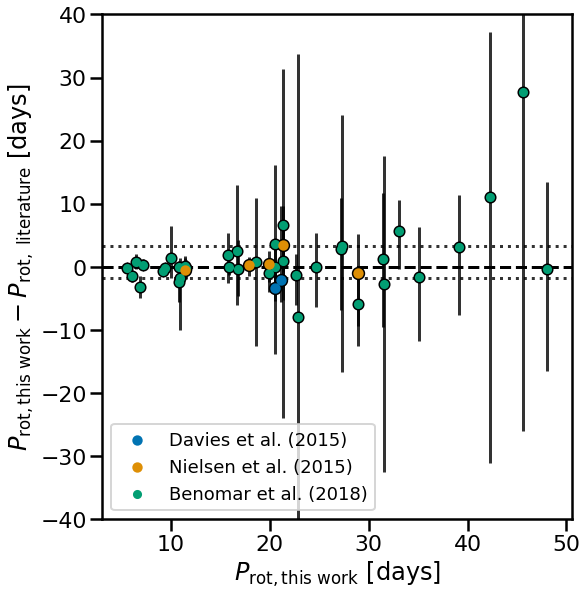

In [102]:
np.random.seed(11)

fig, ax = plt.subplots(figsize=mnras_size(595, square=True))

outA = (ati['P'] - lit['D16_P_rot']).dropna().values
upperA = np.sqrt(ati['u_P']**2 + lit['D16_u_eP_rot']**2).dropna().values
lowerA = np.sqrt(ati['l_P']**2 + lit['D16_l_eP_rot']**2).dropna().values
xA = np.random.uniform(0.5, 1.5, len(outA))
xA = ati['P'][np.isfinite(lit['D16_P_rot']).values]
ax.scatter(xA, outA, s=70, zorder=5, label='Davies et al. (2015)')
ax.errorbar(xA, outA, yerr = [lowerA, upperA], c='k', zorder=0, fmt='|', alpha=.8)

outB = (ati['P'] - lit['N15_P_rot']).dropna().values
upperB = np.sqrt(ati['u_P']**2 + lit['N15_u_eP_rot']**2).dropna().values
lowerB = np.sqrt(ati['l_P']**2 + lit['N15_l_eP_rot']**2).dropna().values
xB = np.random.uniform(0.6, 1.4, len(outB)) + 0.3
xB = ati['P'][np.isfinite(lit['N15_P_rot']).values]
ax.scatter(xB, outB, s=70, zorder=4, label='Nielsen et al. (2015)')
ax.errorbar(xB, outB, yerr = [lowerB, upperB], c='k', zorder=0, fmt='|', alpha=.8)

outD = (ati['P'] - lit['B18_P_rot']).dropna().values
upperD = np.sqrt(ati['u_P']**2 + lit['B18_u_eP_rot']**2).dropna().values
lowerD = np.sqrt(ati['l_P']**2 + lit['B18_l_eP_rot']**2).dropna().values
xD = np.random.uniform(0.3, 1.8, len(outD)) + 1.3
xD = ati['P'][np.isfinite(lit['B18_P_rot']).values]
ax.scatter(xD, outD, s=50, zorder=2, label='Benomar et al. (2018)')
ax.errorbar(xD, outD, yerr = [lowerD, upperD], c='k', zorder=0, fmt='|', alpha=.8)

ax.scatter(xA, outA, s=70, ec='k', lw=5, fc=None)
ax.scatter(xB, outB, s=70, ec='k', lw=5, fc=None)
ax.scatter(xD, outD, s=50, ec='k', lw=5, fc=None)

ax.axhline(0, ls='--', c='k', zorder=0, lw=3)
ax.set_ylim(-50, 50)
ax.set_ylabel(r'$P_{\rm{rot, this\ work}} - P_{\rm rot,\ literature}$ [days]')
ax.set_xlabel(r'$P_{\rm{rot, this\ work}}$ [days]')

ax.legend(loc='lower left', fontsize=18)
fig.tight_layout()

p = np.percentile(np.concatenate([outA, outB, outD]),[15.9, 50, 84.1])

ax.axhline(p[0], c='k', ls=':', alpha=.8, zorder=0, lw=3)
ax.axhline(p[2], c='k', ls=':', alpha=.8, zorder=0, lw=3)
ax.set_ylim(-40, 40)

# plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot.pdf', rasterized=True)
# plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot.png', dpi=300)
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot.pdf', rasterized=True)
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot.png', dpi=300)

In [24]:
p[1]

-0.012831643288440553

In [25]:
p[1]-p[0]

1.8289053303384204

In [26]:
p[2]-p[1]

3.244391410217824

In [ ]:
sys.exit()

In [ ]:
lit.columns

Make the conversions to log

In [ ]:
ati['logP'] = np.log(ati.P)
ati['uplogP'] = np.log(ati.P + ati.u_P) - ati.logP
ati['lologP'] = ati.logP - np.log(ati.P - ati.l_P)

In [ ]:
lit['logD16P'] = np.log(lit.D16_P_rot)
lit['uplogD16P'] = np.log(lit.D16_P_rot + lit.D16_u_eP_rot) - lit.logD16P
lit['lologD16P'] = lit.logD16P - np.log(lit.D16_P_rot - lit.D16_l_eP_rot)

lit['logN15P'] = np.log(lit.N15_P_rot)
lit['uplogN15P'] = np.log(lit.N15_P_rot + lit.N15_u_eP_rot) - lit.logN15P
lit['lologN15P'] = lit.logN15P - np.log(lit.N15_P_rot - lit.N15_l_eP_rot)

lit['logB18P'] = np.log(lit.B18_P_rot)
lit['uplogB18P'] = np.log(lit.B18_P_rot + lit.B18_u_eP_rot) - lit.logB18P
lit['lologB18P'] = lit.logB18P - np.log(lit.B18_P_rot - lit.B18_l_eP_rot)

Flag anomalous rotators

In [ ]:
ati['exclude'] = 0
dP = ati.logP / lit.logB18P
ati.loc[dP < 0.5, 'exclude'] = 1

In [ ]:
lit.index = ati.index

In [ ]:
lit = lit[ati.exclude != 1]
ati = ati[ati.exclude != 1]

In [ ]:
np.random.seed(11)

def e(a, siga, b, sigb):
    #return sigma for a/b
    rhs = (siga / b)**2 + ((a*sigb)/b**2)**2
    return np.sqrt(rhs)

fig, ax = plt.subplots(figsize=mnras_size(595, square=True))

outA = (ati['logP'] / lit['logD16P']).dropna().values
atierrlog = ati[['lologP','uplogP']].max(axis=1)
literrlog = lit[['lologD16P','uplogD16P']].max(axis=1)
err = e(ati['logP'], atierrlog, lit['logD16P'], literrlog).dropna().values
xA = ati['P'][np.isfinite(lit['D16_P_rot']).values]
ax.scatter(xA, outA, s=70, zorder=5, label='Davies et al. (2015)')
ax.errorbar(xA, outA, yerr = err, c='k', zorder=0, fmt='|', alpha=.8)

outB = (ati['logP'] / lit['logN15P']).dropna().values
atierrlog = ati[['lologP','uplogP']].max(axis=1)
literrlog = lit[['lologN15P','uplogN15P']].max(axis=1)
err = e(ati['logP'], atierrlog, lit['logN15P'], literrlog).dropna().values
xB = ati['P'][np.isfinite(lit['N15_P_rot']).values]
ax.scatter(xB, outB, s=70, zorder=5, label='Nielsen et al. (2015)')
ax.errorbar(xB, outB, yerr = err, c='k', zorder=0, fmt='|', alpha=.8)

outD = (ati['logP'] / lit['logB18P']).dropna().values
atierrlog = ati[['lologP','uplogP']].max(axis=1)
literrlog = lit[['lologB18P','uplogB18P']].max(axis=1)
err = e(ati['logP'], atierrlog, lit['logB18P'], literrlog).dropna().values
xD = ati['P'][np.isfinite(lit['B18_P_rot']).values]
ax.scatter(xD, outD, s=70, zorder=5, label='Benomar et al. (2018)')
ax.errorbar(xD, outD, yerr = err, c='k', zorder=0, fmt='|', alpha=.8)

ax.scatter(xA, outA, s=100, ec='k', lw=5, fc=None)
ax.scatter(xB, outB, s=100, ec='k', lw=5, fc=None)
ax.scatter(xD, outD, s=80, ec='k', lw=5, fc=None)

ax.axhline(1, ls='--', c='k', zorder=0, lw=3)
ax.set_ylabel(r'$\Delta \ln(P_{\rm{rot}}$ [days])')
ax.set_xlabel(r'$P_{\rm{rot, this\ work}}$ [days]')

ax.legend(loc='lower right', fontsize=18)
fig.tight_layout()

p = np.percentile(np.concatenate([outA, outB, outD]),[15.9, 84.1])

ax.axhline(p[0], c='k', ls=':', alpha=.8, zorder=0, lw=3)
ax.axhline(p[1], c='k', ls=':', alpha=.8, zorder=0, lw=3)


# # plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot.pdf', rasterized=True)
# # plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot.png', dpi=300)
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot_alt.pdf', rasterized=True)
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot_alt.png', dpi=300)

In [ ]:
lit.columns

In [ ]:
np.random.seed(11)

def e(a, siga, b, sigb):
    #return sigma for a/b
    rhs = (siga / b)**2 + ((a*sigb)/b**2)**2
    return np.sqrt(rhs)

fig, ax = plt.subplots(figsize=mnras_size(595, square=True))

outA = (ati['P'] / lit['D16_P_rot']).dropna().values
atierr = ati[['l_P','u_P']].max(axis=1)
literr = lit[['D16_l_eP_rot','D16_u_eP_rot']].max(axis=1)
err = e(ati['P'], atierr, lit['D16_P_rot'], literr).dropna().values
xA = ati['P'][np.isfinite(lit['D16_P_rot']).values]
ax.scatter(xA, outA, s=70, zorder=5, label='Davies et al. (2015)')
ax.errorbar(xA, outA, yerr = err, c='k', zorder=0, fmt='|', alpha=.8)

outB = (ati['P'] / lit['N15_P_rot']).dropna().values
atierr = ati[['l_P','u_P']].max(axis=1)
literr = lit[['N15_l_eP_rot','N15_u_eP_rot']].max(axis=1)
err = e(ati['P'], atierr, lit['N15_P_rot'], literr).dropna().values
xB = ati['P'][np.isfinite(lit['N15_P_rot']).values]
ax.scatter(xB, outB, s=70, zorder=5, label='Nielsen et al. (2015)')
ax.errorbar(xB, outB, yerr = err, c='k', zorder=0, fmt='|', alpha=.8)

outD = (ati['P'] / lit['B18_P_rot']).dropna().values
atierr = ati[['l_P','u_P']].max(axis=1)
literr = lit[['B18_l_eP_rot','B18_u_eP_rot']].max(axis=1)
err = e(ati['P'], atierr, lit['B18_P_rot'], literr).dropna().values
xD = ati['P'][np.isfinite(lit['B18_P_rot']).values]
ax.scatter(xD, outD, s=70, zorder=5, label='Benomar et al. (2018)')
ax.errorbar(xD, outD, yerr = err, c='k', zorder=0, fmt='|', alpha=.8)

ax.scatter(xA, outA, s=100, ec='k', lw=5, fc=None)
ax.scatter(xB, outB, s=100, ec='k', lw=5, fc=None)
ax.scatter(xD, outD, s=80, ec='k', lw=5, fc=None)

ax.axhline(1, ls='--', c='k', zorder=0, lw=3)
ax.set_ylabel(r'$\Delta \ln(P_{\rm{rot}}$ [days])')
ax.set_xlabel(r'$P_{\rm{rot, this\ work}}$ [days]')

ax.legend(loc='upper left', fontsize=18)
fig.tight_layout()

p = np.percentile(np.concatenate([outA, outB, outD]),[15.9, 84.1])

ax.axhline(p[0], c='k', ls=':', alpha=.8, zorder=0, lw=3)
ax.axhline(p[1], c='k', ls=':', alpha=.8, zorder=0, lw=3)

ax.set_ylim(0, 3)

# # plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot.pdf', rasterized=True)
# # plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot.png', dpi=300)
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot_alt.pdf', rasterized=True)
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/seis_comparison_rot_alt.png', dpi=300)